#**EDA with Python on Titanic dataset**

We'll be trying to predict a classification-survived or decreased. Lets begin out understanading of implementing logistic Regression in python for classification.

We'll use a "Semi-Cleaned" version of titanic dataset, if you use the data set hosted directly on kaggle, you need to do some additional cleaning not shown in this notebook.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving titanic_train.csv to titanic_train.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df_train = pd.read_csv("titanic_train.csv")

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Checking Missing Values and further analysis

In [ ]:
df_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

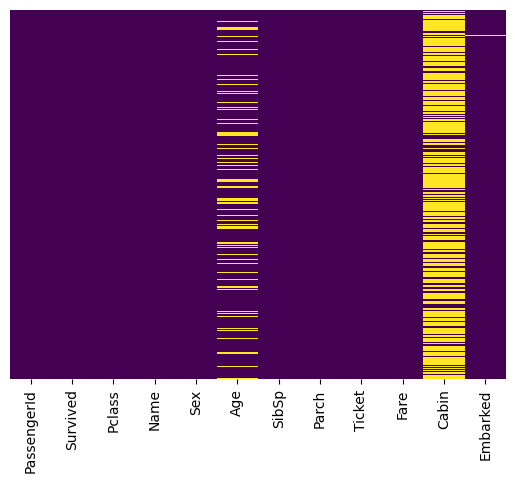

In [ ]:
sns.heatmap(df_train.isnull(),yticklabels =False,cbar=False,cmap='viridis')

In [ ]:
age_missing = (177/891)*100
cabin_missing = (687/891)*100

print("Percentage of missing age column value: {} \nPercentage of missing cabin column value: {}".format(age_missing,cabin_missing))

Percentage of missing age column value: 19.865319865319865 
Percentage of missing cabin column value: 77.10437710437711


As we can see around 20% age column data is missing from the dataset and around 78% of the cabin column data is missing from the datatset. We cannot directly drop this as it holds a large portion of dataset So, we will treating the columns to fill null values.

Before that lets look into other columns as well by visualizing them.

<Axes: xlabel='Survived', ylabel='count'>

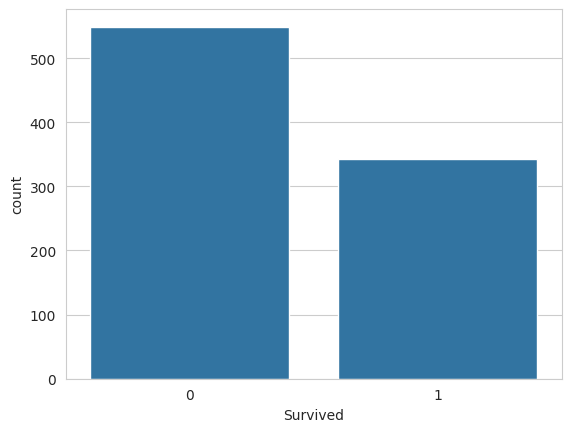

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df_train)

Now we just saw the number of people survived and not survived with help of countplot. "0" represent that the person does not survived,"1" represents that the person survived.

Let check the same on the basis of sex.

<Axes: xlabel='Survived', ylabel='count'>

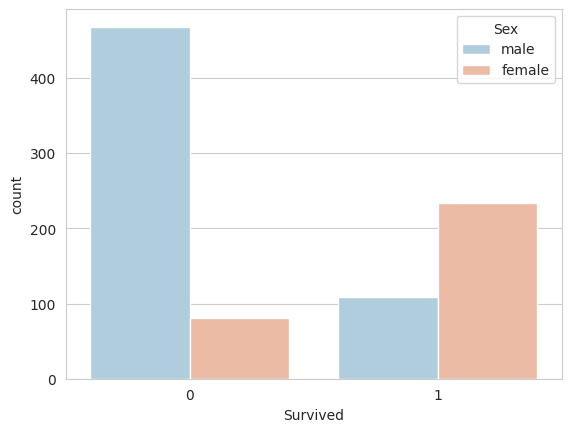

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df_train,hue='Sex',palette='RdBu_r')

From the above graph we can see that there are more numbers of males who did not survived as compared to females and there are more number of females who survived as compared to males.

From here we can see that more number of females got survived.

Now let check the number of surviver based on passenger class i.e. "Pclass" column.

<Axes: xlabel='Survived', ylabel='count'>

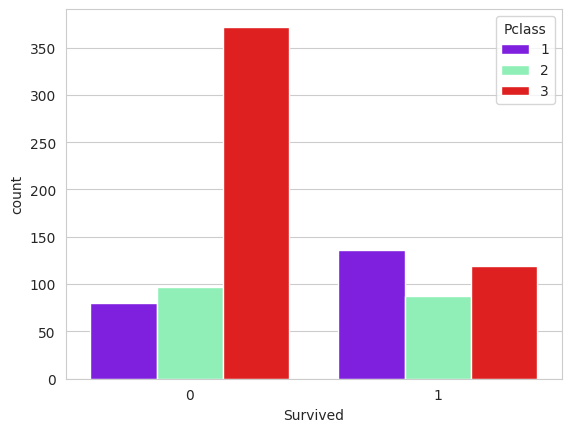

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df_train,hue='Pclass',palette='rainbow')

Here "Pclass" is an ordinal variable where 1 represents the number of passengers travelling in First class and same goes with 2,3 as second and third class.

What we can see is more number of people from first class survived then not survived, and most of the people who did not survived belongs to third class.

Now, lets check the distribution of age of all the passengers

<ipython-input-14-7aadfae67491>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Age'].dropna(),kde=False,bins=40)


<Axes: xlabel='Age'>

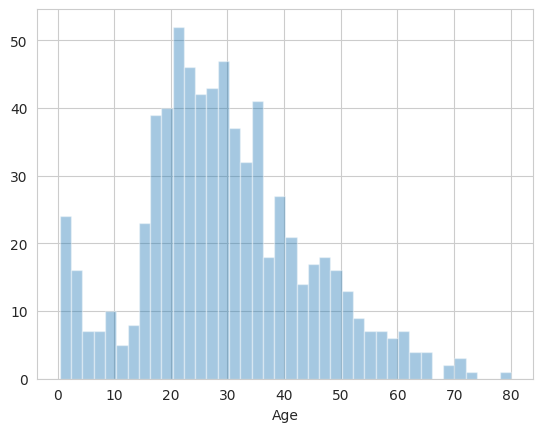

In [ ]:
sns.distplot(df_train['Age'].dropna(),kde=False,bins=40)

From here we got to know that most of the passegers lies in the age range of 20-30.

<Axes: >

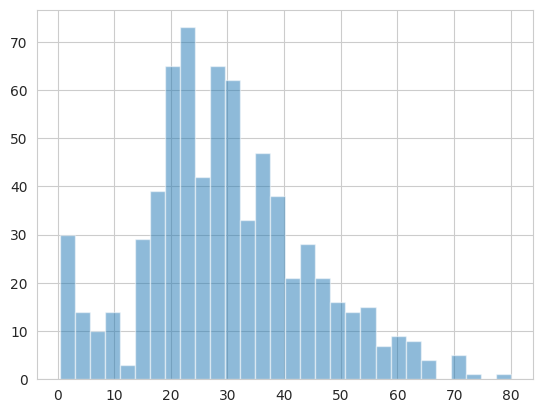

In [ ]:
df_train['Age'].hist(bins=30,alpha=0.5)

<Axes: xlabel='SibSp', ylabel='count'>

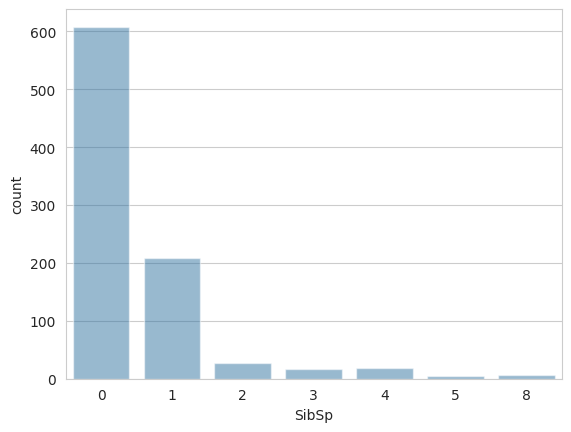

In [ ]:
sns.countplot(x='SibSp',data=df_train,alpha=0.5)

From the above plot we can see that most of the passengers are travelling with zero siblings or Spouse

#**Handling Missing Values and Data Cleaning**

As we saw that we have some columns with missing values which are 'Age' and 'Cabin'. We will first take a look at 'Age' column.

here what we can do is we can fill the empty values in the 'Age'
 column with the mean ages of passengers as per there class of travelling i.e. 'Pclass'


<Axes: xlabel='Pclass', ylabel='Age'>

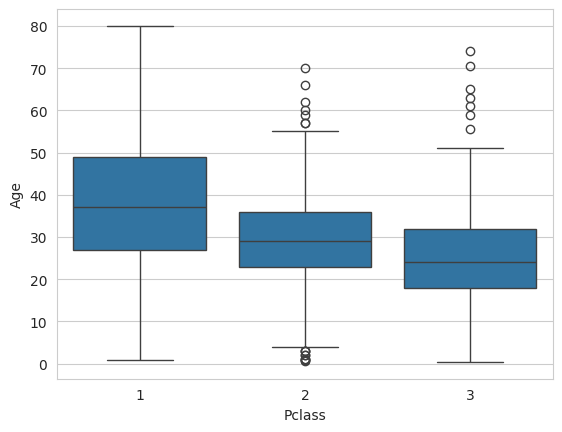

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=df_train)

From above box plot we can see that for First class passenger the mean age is around 37-38, for second class the mean age is around 29 and for third class the mean age is around 24-25.

Above analysis make sense as wealthier passengers are travelling in higher class and also they are older as there mean age is comparitively high.

Lets find the accurate mean ages as per the pclass column and fill all the missing value(imputation).

In [ ]:
mean_ages = df_train.groupby('Pclass')['Age'].mean()

mean_ages

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

We have 38 as mean age for the passengers travelling in first class.
We have 29 as mean age for the passengers travelling in second class.
We have 25 as mean age for the passengers travelling in Third class.

In [ ]:
age = df_train['Age']
pd.isnull(age)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [ ]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass==1:
      return 38
    elif Pclass==2:
      return 29
    else:
      return 25
  else:
    return Age


In [ ]:
df_train['Age'] = df_train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

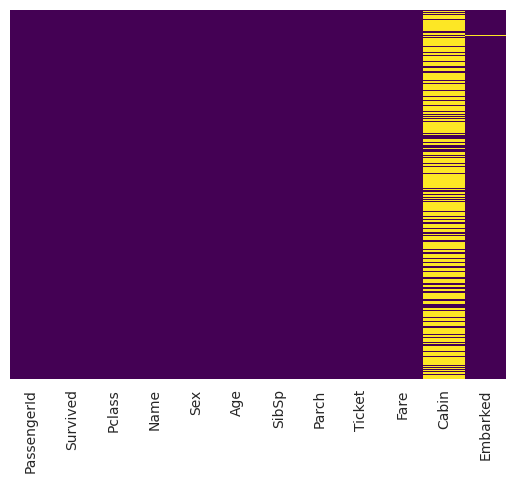

In [ ]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We can see now all the null values in 'Age' column are now filled and there are no null values available in 'Age' column.

Now if we look at the 'Cabin' column there are soo many null values, So currently we will drop this column and also drop the null value in column 'Embarked.

In [ ]:
df_train.drop(columns=['Cabin'],axis=1,inplace=True)

In [ ]:
df_train.dropna(inplace=True)

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


<Axes: >

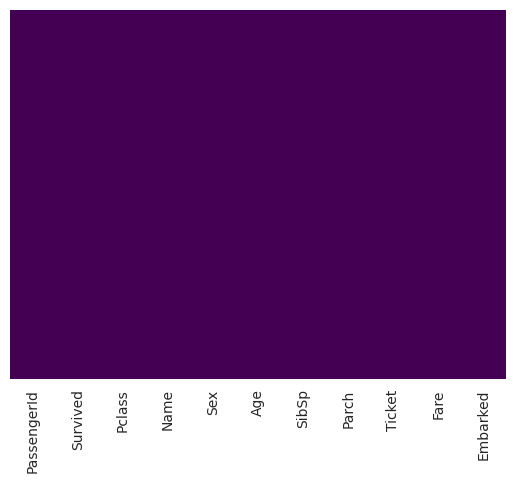

In [ ]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#**Converting Categorical Features**

We will need to convert features to dummy variables using pandas! Otherwise our Machine Learning algorithm won't be able to directly take in those features as inputs.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


We can see there are multiple categorical columns namely:['Name','Sex','Ticket','Embarked'].

So we will be converting 'Embarked' & 'Sex' column and we will be droping 'Name' & 'Ticket' column as they will not bring anything to us for now.

In [ ]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
# here we use drop_first to decrease the number of total columns created on the basis of unique values of the column,
#bcoz other columns can represent the first column.
pd.get_dummies(df_train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
embarked = pd.get_dummies(df_train['Embarked'],drop_first=True)
sex = pd.get_dummies(df_train['Sex'],drop_first=True)

##Dropping all unneccesary columns from dataset

In [ ]:
#Dropping Sex and Embarked as we already converted tehm and safed in other DF
df_train.drop(columns=['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
df_train = pd.concat([df_train,sex,embarked],axis=1)

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


#**Building a Logistic Regression Model**

Lets start by splitting our data into a training set and test set.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df_train.drop('Survived',axis=1),
    df_train['Survived'],
    test_size=0.4,
    random_state=101)

#Training and Predicting

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy = confusion_matrix(Y_test,predictions)

In [ ]:
accuracy

array([[192,  24],
       [ 48,  92]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_s = accuracy_score(Y_test,predictions)
accuracy_s

0.797752808988764

In [ ]:
accuracy_s = round(accuracy_s*100)
accuracy_s

80

In [ ]:
print("Accuracy from Logistic regression is: {}%".format(accuracy_s))

Accuracy from Logistic regression is: 80%
